## RESOLVIENDO ECUACIONES DIFERENCIALES ORDINARIAS EN PYTHON/SYMPY

## la función *dsolve*
La función de solve sirve para recolver cuaalquier EDO soportada. La sintasis más básica es:
    dsolve(eq, f)
- siendo **eq** una expresión de la clase ***Equality***, o bien, una expresión que se asume está igualada a cero. En ambos casos se considera que este argumento contiene la descripción de la EDO.
- siendo **f** la función con respecto a la cuál se reuelve la ED; y en general, es un objeto de la clase **Funtion**.

## PROBLEMAS DE VALOR INICIAL
Cuando necesitamos reolver un problema de valor inicial, podemos usar **dsolve** con un argumento adicional.  

**<center> dsolve(eq, f, ics=CI) </center>**  
hay que tener cierta precausión, porque en este caso estamos psasndo un *keyword argument* en lugar de un argumento posicional.  

En este caso **CI** será un diccionario de la forma:   
<center>{f(x0): f1, f(x).diff(x).subs(x,x0): f2, ...}<center>   
    
dependiendo, obviamente del orden de la EDO.

# Ejemplo
Resolver la siguiente ecuación diferncial con condiciones iniciales:   

<center>$y''+y=4x+10senx $<center>   
<center>sujeta a: $y(\pi)=0;\;\;\;y'(\pi)=2$<center> 

In [1]:
from sympy import *
init_printing(use_latex="mathjax")
#init_printing()
#import sympy as sp

In [2]:
x = symbols("x")
y = Function("y")

ed = Eq( y(x).diff(x, 2) + y(x), 4*x+10*sin(x))
#CI = {y(pi):0, y(x).diff(x).subs(x, pi):2}
res=dsolve(ed, y(x))
apart(res,y(x))

y(x) = C₁⋅cos(x) + C₂⋅sin(x) - 5⋅x⋅cos(x) + 4⋅x

In [3]:
CI = {y(pi):0, y(x).diff(x).subs(x, pi):2}
res=dsolve(ed, y(x), ics=CI)
apart(res,y(x))

y(x) = -5⋅x⋅cos(x) + 4⋅x + 7⋅sin(x) + 9⋅π⋅cos(x)

### Grafica de la función

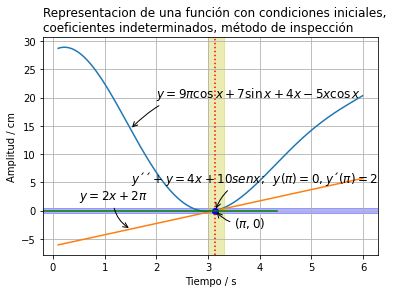

In [4]:
from pylab import *
import matplotlib.pyplot as plt
from math import *
from numpy import *

# --- gráfica normal dentro de la celda
%matplotlib inline
# ---- grafica interactiva en ventana separada
#%matplotlib qt

x = arange(0.1, 6, 0.01)

#y1 = sin(x)/x
y1 = 9*pi*cos(x) + 7*sin(x) + 4*x - 5*x*cos(x)
y2 = 2*x-2*pi
p1, p2 = plot(x, y1, x, y2)
#p1 = plot(x, y1)

# Texto en la gráfica en coordenadas (x,y)
#texto1 = text(0.5, 10, r'y = $9\pi\cos x +7\sin x + 4x - 5x\cos x$', fontsize=12)
#texto2 = text(13, 0.2, r'$\sin(x) \cdot e^{-x}$', fontsize=16)

# ---------------------------------------------
# Punto a señalar en la primera gráfica
t1 = 3.141516
y1 = 9*pi*cos(t1) + 7*sin(t1) + 4*t1 - 5*t1*cos(t1)

# Pinto las coordenadas con un punto negro
punto = plot([t1], [y1], 'bo')

# Hago un señalización con flecha
nota = plt.annotate(r'$y´´+y=4x+10senx;\;\; y(\pi)=0, y´(\pi)=2 $',
         xy=(t1, y1),
         xycoords='data',
         xytext=(1.5, 5),
         fontsize=12,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.3"))

# 2do Punto a señalar en la gráfica
t2 = 1.5
y2 = 2*t2 - 2*pi

# Pinto las coordenadas con un punto negro
#punto = plot([t2], [y2], 'bo')

# Hago un señalización con flecha
nota = plt.annotate(r'$y=2x+2\pi$',
         xy=(t2, y2),
         xycoords='data',
         xytext=(0.5, 2),
         fontsize=12,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.3"))

# 3er Punto a señalar en la gráfica
t3 = 1.5
y3 = 9*pi*cos(t3) + 7*sin(t3) + 4*t3 - 5*t3*cos(t3)

# Pinto las coordenadas con un punto negro
#punto = plot([t3], [y3], 'bo')

# Hago un señalización con flecha
nota = plt.annotate(r'$y = 9\pi\cos x +7\sin x + 4x - 5x\cos x$',
         xy=(t3, y3),
         xycoords='data',
         xytext=(2, 20),
         fontsize=12,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.3"))

# 4to Punto a señalar en la gráfica
t4 = pi
y4 = 9*pi*cos(t4) + 7*sin(t4) + 4*t4 - 5*t4*cos(t4)

# Pinto las coordenadas con un punto negro
#punto = plot([t3], [y3], 'bo')

# Hago un señalización con flecha
nota = plt.annotate(r'$(\pi,0)$',
         xy=(t4, y4),
         xycoords='data',
         xytext=(3.5, -3),
         fontsize=12,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=-.3"))
# --------------------------------------------

# -------------------------------------------
# Trazo una línea vertical en la coordenada x=pi color rojo (r)
# y con trazo punteado
axvline(3.14156, color='r', ls="dotted")

# Línea horizontal en la coordenada y=10.4 color verde (g)
# que termina en la limitad de la gráfica (0.5, va de 0 a 1)
axhline(0, color='g', xmax=0.7)

# Banda horizontal de y=-0.1 a y=0.1 de color azul
# y 30% de transparencia (alpha=0.3)
axhspan(-0.5, 0.5, alpha=0.3, color='b')

# Banda vertical de x=7 a x=8 de color amarillo
# y 30% de transparencia
axvspan(3, 3.3, alpha=0.3, color='y')
# --------------------------------------------

# Añado una malla al gráfico
grid()

title("Representacion de una función con condiciones iniciales,\n" + "coeficientes indeterminados, método de inspección", loc="left")
xlabel('Tiempo / s')
ylabel('Amplitud / cm')

show()